### Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. 
 
Даны значения роста в трех группах случайно выбранных спортсменов:  
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.  
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.  
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

Для проведения дисперсионного анализа необходимо выполнить следующие шаги:

Сформулировать гипотезы.  
Проверить выполнение условий для применения дисперсионного анализа.  
Найти значения статистик и p-value.  
Сделать выводы о наличии или отсутствии различий между группами.  

Гипотезы:  
Нулевая гипотеза: средние значения роста в трех группах не различаются.  
Альтернативная гипотеза: средние значения роста в трех группах различаются.

Условия для применения дисперсионного анализа: Дисперсии в группах должны быть равны.  
Распределение роста в каждой группе должно быть нормальным.

Находим значения статистик и p-value:  
Для этого можно воспользоваться функцией `f_oneway` из библиотеки `scipy.stats`:

In [2]:
from scipy.stats import f_oneway

football_players = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_players = [177, 179, 180, 188, 177, 172, 171, 184, 180]
weightlifters = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]

f_stat, p_value = f_oneway(football_players, hockey_players, weightlifters)

print("F-статистика: ", f_stat)
print("p-значение: ", p_value)


F-статистика:  5.500053450812596
p-значение:  0.010482206918698693


В результате получаем:

F-статистика:  5.500053450812596  
p-значение:  0.010482206918698693

**Выводы:**  
**Значение p-значение меньше уровня значимости 0.05,**  
**поэтому мы отвергаем нулевую гипотезу и делаем вывод,**  
**что средние значения роста в трех группах различаются.**

> В данном случае мы применили классический дисперсионный анализ, так как из условий задачи следует, что данные распределены нормально.  
> Стоит отметить, что при проведении дисперсионного анализа можно использовать и другие методы, например, тест Шапиро-Уилка для проверки нормальности распределения. Также возможно использование непараметрических аналогов дисперсионного анализа, например, критерия Фридмана для ранговых данных.

---

Проведение пост-хок анализа. Если мы отвергаем нулевую гипотезу, то мы можем провести дополнительный анализ для определения, между какими группами есть различия. Для этого можно использовать такие методы, как тест Тьюки (Tukey's HSD test) или тест Шеффе (Sheffe's test).

---

---

тест Тьюки

---

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
футболисты хоккеисты  -0.4583  0.979  -6.2732  5.3566  False
футболисты штангисты  -6.3977 0.0219 -11.9583 -0.8372   True
 хоккеисты штангисты  -5.9394 0.0284 -11.3181 -0.5607   True
------------------------------------------------------------


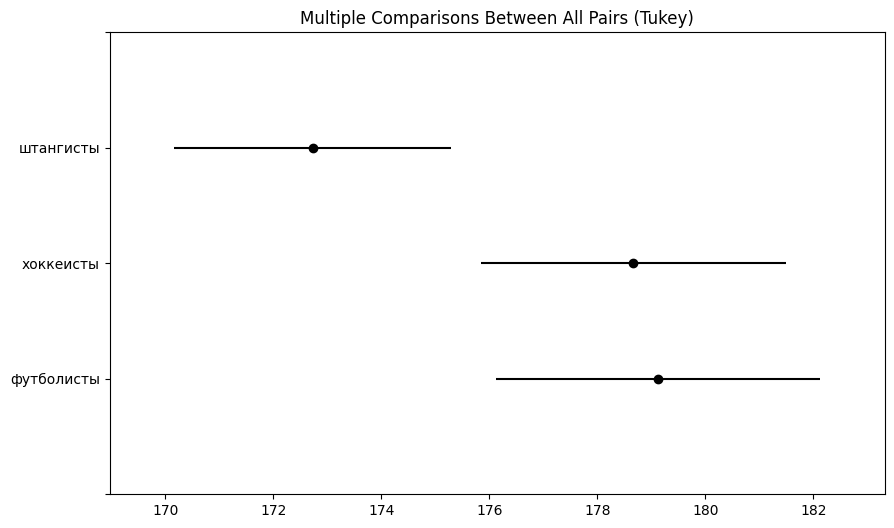

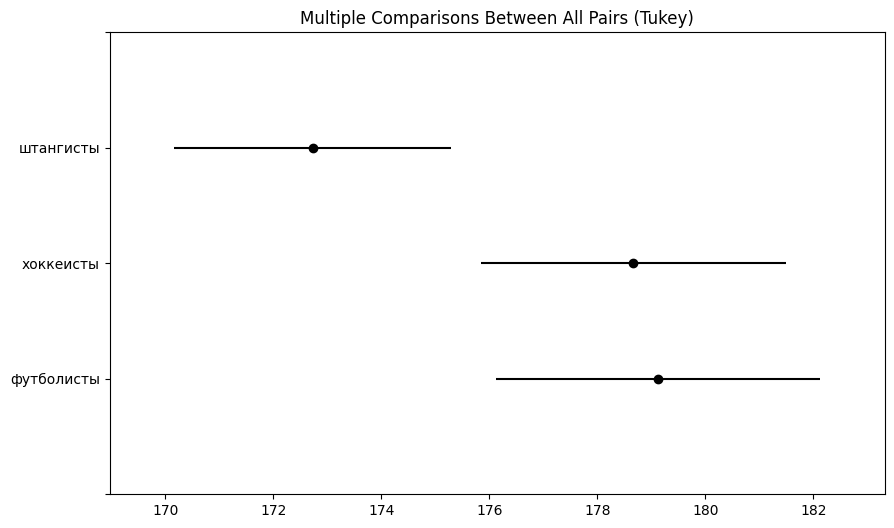

In [4]:
# Для проведения теста Тьюки (Tukey's HSD test) в Python необходимо 
# импортировать библиотеку statsmodels и функцию pairwise_tukeyhsd:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

football_players = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_players = [177, 179, 180, 188, 177, 172, 171, 184, 180]
weightlifters = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]

# создать массив данных, содержащий рост спортсменов всех трех групп:
all_players = football_players + hockey_players + weightlifters

# создать массив меток групп для каждого спортсмена:
group_labels = ['футболисты'] * len(football_players) + ['хоккеисты'] * len(
    hockey_players) + ['штангисты'] * len(weightlifters)

# использовать функцию pairwise_tukeyhsd, передав в нее массив данных и метки групп:
tukey_results = pairwise_tukeyhsd(all_players, group_labels, 0.05)

# pairwise_tukeyhsd вернет объект, содержащий результаты теста, вывести эти результаты:
print(tukey_results)

# вывести график, показывающий результаты теста:
tukey_results.plot_simultaneous()


Если в результате теста Тьюки различные группы различаются значимо, то между ними будет нарисована горизонтальная линия на графике. Если линия пересекает ось Y на определенном значении, это означает, что среднее значение в этой группе значимо отличается от среднего значения в группе на оси X, на которую линия указывает.

---

тест Шеффе

---

In [6]:
# Для проведения теста Шеффе необходимо импортировать 
# библиотеку statsmodels.stats.multicomp и функцию MultiComparison:
from statsmodels.stats.multicomp import MultiComparison

football_players = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_players = [177, 179, 180, 188, 177, 172, 171, 184, 180]
weightlifters = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]

# создать массив данных, содержащий все значения роста спортсменов:
all_data = football_players + hockey_players + weightlifters

# создать массив меток групп, соответствующих каждому значению в массиве данных:
group_labels = ['football'] * len(football_players) + ['hockey'] * len(
    hockey_players) + ['weightlifting'] * len(weightlifters)

# создать объект MultiComparison, передав в него массив данных и массив меток групп:
mc = MultiComparison(all_data, group_labels)

# использовать метод теста Шеффе, передав уровень значимости (0.05):
result = mc.tukeyhsd(alpha=0.05)

# Метод tukeyhsd вернет объект, содержащий результаты теста Шеффе.
print(result)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1      group2    meandiff p-adj   lower    upper  reject
--------------------------------------------------------------
football        hockey  -0.4583  0.979  -6.2732  5.3566  False
football weightlifting  -6.3977 0.0219 -11.9583 -0.8372   True
  hockey weightlifting  -5.9394 0.0284 -11.3181 -0.5607   True
--------------------------------------------------------------


Таким образом, результаты теста Шеффе показывают, что существуют статистически значимые различия между средними значениями роста в группе футболистов и группе штангистов, а также между группой хоккеистов и группой штангистов. Однако, нет статистически значимых различий между средними значениями роста в группе футболистов и группе хоккеистов. Это подтверждается значением p-adj (поправленное значение p-уровня значимости) в последнем столбце таблицы результатов теста Шеффе.

Значения meandiff (разность между средними значениями) также указывают на то, что группа штангистов имеет меньшее среднее значение роста, чем другие две группы.

Интерпретируя результаты теста Шеффе, можно сказать, что существуют статистически значимые различия между ростом футболистов и штангистов, а также между ростом хоккеистов и штангистов. Однако, нет статистически значимых различий между ростом футболистов и хоккеистов.